## MSE

均方误差MSE（Mean Squared Error）

In [2]:
import numpy as np
from math import sqrt

In [1]:
def mean_squared_error(y_true,y_predict):
    """计算y_true和y_predict之间的MSE"""
    assert y_true.shape[0]==y_predict.shape[0],\
        "the size of y_true must be equal to the size of y_predict"
    return np.sum((y_true-y_predict)**2)/y_true.shape[0]


## RMSE
 均方根误差RMSE（Root Mean Squarde Error）。为消除量纲。

In [3]:
def root_mean_squared_error(y_true,y_predict):
    """计算y_true和y_predict之间的RMSE"""
    return sqrt(mean_squared_error(y_true,y_predict))


## MAE
平均绝对误差MAE（Mean Absolute Error）

In [4]:
def mean_absolute_error(y_true, y_predict):
    """计算y_true和y_predict之间的MAE"""
    assert y_true.shape[0]==y_predict.shape[0],\
        "the size of y_true must be equal to the size of y_predict"
    return np.sum(np.absolute(y_true-y_predict))/y_true.shape[0]

## R Square


In [9]:
def r2_score(y_true,y_predict):
    """计算简单线性回归准确度（R方）"""
    return 1- mean_squared_error(y_true,y_predict)/np.var(y_true)

## 小应用
- 使用波士顿房产数据集

### 手工代码实现

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
# 查看数据集描述
boston=datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

选择 RM特征做回归算法：
 RM average number of rooms per dwelling 每个住宅的平均房间数

In [13]:
# 查看数据集的特征列表
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
# 取出数据中的第六例的所有行（房间数量）
x=boston.data[:,5]
x.shape

(506,)

In [17]:
# 取出样本标签
y=boston.target
y.shape

(506,)

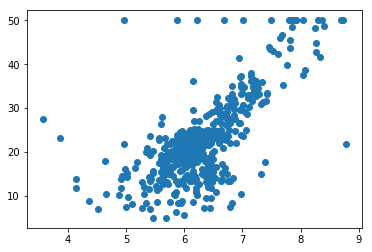

In [22]:
#可视化
plt.scatter(x,y)
plt.show()

在图中我们可以看到 50W 美元档分布着一些点。这些点可能是超出了限定范围（比如在问卷调查中，价格的最高档位是“50万及以上”，那么就全都划到50W上了，因此在本例中，可以将这部分数据去除）

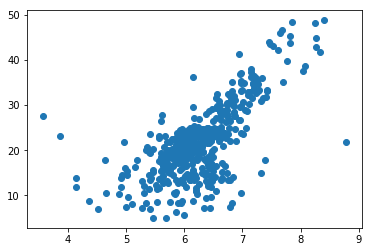

In [25]:
#用比较运算符返回一个布尔值的向量，将其作为索引，直接在矩阵里对每个元素进行过滤。
x=x[y<50.0]
y=y[y<50.0]

plt.scatter(x,y)
plt.show()

In [28]:
# 划分数据集
from myML_Algorithm.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test=tts(x, y, seed=666)

In [45]:
# 建模
from sklearn.linear_model import LinearRegression as LR
reg=LR()
reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
reg.predict(x_train.reshape(-1,1)).shape

(392, 1)

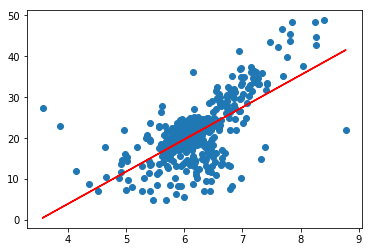

In [48]:
# 可视化
plt.scatter(x_train,y_train)
plt.plot(x_train, reg.predict(x_train.reshape(-1,1)),color='r')
plt.show()

In [54]:
# 预测
y_predict=reg.predict(x_test.reshape(-1,1))
y_predict.T

array([[23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
         5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
        17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
        21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
        19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
        28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
        31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
        20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
        21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
        23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
        19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
        18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
        18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
        24.65812158, 20.83774636, 19.77653102, 27.8

In [55]:
# 查看评价指标
from myML_Algorithm.metrics import mean_squared_error as MSE
from myML_Algorithm.metrics import root_mean_squared_error as RMSE
from myML_Algorithm.metrics import mean_absolute_error as MAE
from myML_Algorithm.metrics import r2_score as R_square

In [59]:
MSE(y_test.reshape(-1,1),y_predict)

24.15660213438744

In [60]:
RMSE(y_test.reshape(-1,1),y_predict)

4.914936635846636

In [62]:
MAE(y_test.reshape(-1,1),y_predict)

3.543097440946387

In [63]:
R_square(y_test.reshape(-1,1),y_predict)

0.6129316803937321

### sklearn的实现

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [67]:
mean_squared_error(y_test.reshape(-1,1),y_predict)

24.15660213438744

In [68]:
mean_absolute_error(y_test.reshape(-1,1),y_predict)

3.543097440946387

In [69]:
r2_score(y_test.reshape(-1,1),y_predict)

0.6129316803937322